In [88]:
#import delle librerie utili

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf

In [89]:
#selezione delle date di inizio e fine

starting_date = '2011-11-30'
ending_date = '2021-11-30'

In [90]:
#assets
risky_assets = ['JNJ', 'PFE', 'AAPL', 'MSFT', 'JPM', 'AXP']

In [91]:
#creo i dataframe contenenti i dati delle azioni scelte [JNJ, PFE, AAPL, MSFT, JPM, AXP]
#raccolgo i dati tramite la funzione 'get_data_yahoo'

JNJ_df = yf.download("JNJ", starting_date, ending_date)
PFE_df = yf.download("PFE", starting_date, ending_date)
AAPL_df = yf.download("AAPL", starting_date, ending_date)
MSFT_df = yf.download("MSFT", starting_date, ending_date)
JPM_df = yf.download("JPM", starting_date, ending_date)
AXP_df = yf.download("AXP", starting_date, ending_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [92]:
#stock price

JNJ_df = JNJ_df['Adj Close']
PFE_df = PFE_df['Adj Close']
AAPL_df = AAPL_df['Adj Close']
MSFT_df = MSFT_df['Adj Close']
JPM_df = JPM_df['Adj Close']
AXP_df = AXP_df['Adj Close']

In [93]:
#creo un df con tutti i prezzi delle aziende

data = {'JNJ': JNJ_df,
        'PFE': PFE_df,
        'AAPL': AAPL_df,
        'MSFT': MSFT_df,
        'JPM': JPM_df,
        'AXP': AXP_df
       }

#all_stock_price_df = pd.DataFrame({'JNJ': [JNJ_df],'PFE': [PFE_df],'AAPL': [AAPL_df],'MSFT': [MSFT_df],'JPM': [JPM_df],'AXP': [AXP_df]})

all_stock_price_df = pd.DataFrame(data, columns= ['JNJ','PFE','AAPL','MSFT','JPM','AXP'])
#all_stock_price_df = JNJ_df+PFE_df


In [94]:
all_stock_price_df

,JNJ,PFE,AAPL,MSFT,JPM,AXP
Date,,,,,,
2011-11-30,46.507637,12.421244,11.586073,20.373428,22.290562,40.602760
2011-12-01,46.313618,12.396484,11.759772,20.134493,21.923489,40.391472
2011-12-02,45.609398,12.309842,11.813429,20.086702,23.269413,40.763351
2011-12-05,45.530346,12.278897,11.913769,20.469004,24.118713,41.228199
2011-12-06,45.623764,12.520269,11.851319,20.437138,23.917191,41.042267
...,...,...,...,...,...,...
2021-11-22,152.237976,48.076744,159.410736,334.393555,155.851257,166.936020
2021-11-23,153.181732,47.964066,159.796875,332.277985,159.578033,166.887222
2021-11-24,152.752777,47.785656,160.321564,332.504303,158.326294,167.629547


In [95]:
#creo un nuovo df contenente solo la colonna 'Adj Close' semplificata su base mensile

JNJ_monthly_price = JNJ_df.resample('M').last()
PFE_monthly_price = PFE_df.resample('M').last()
AAPL_monthly_price = AAPL_df.resample('M').last()
MSFT_monthly_price = MSFT_df.resample('M').last()
JPM_monthly_price = JPM_df.resample('M').last()
AXP_monthly_price = AXP_df.resample('M').last()

In [96]:
#creo un df con tutti i prezzi MENSILI delle aziende

data = {'JNJ': JNJ_monthly_price,
        'PFE': PFE_monthly_price,
        'AAPL': AAPL_monthly_price,
        'MSFT': MSFT_monthly_price,
        'JPM': JPM_monthly_price,
        'AXP': AXP_monthly_price
       }

all_stock_monthly_price_df = pd.DataFrame(data, columns= ['JNJ','PFE','AAPL','MSFT','JPM','AXP'])

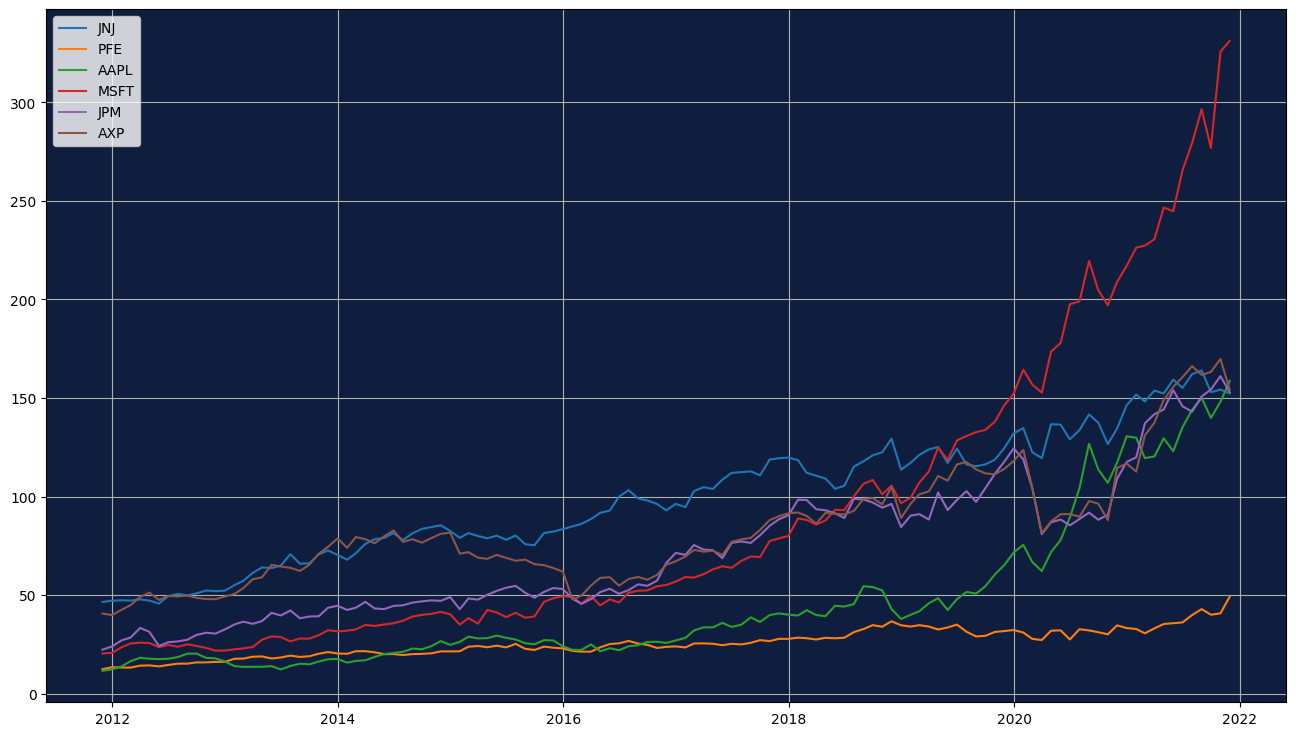

In [97]:
plt.figure(figsize = (16,9))
ax = plt.axes()
ax.set_facecolor("#0f1e3e")
plt.plot(all_stock_monthly_price_df)
plt.gca().legend(('JNJ', 'PFE', 'AAPL', 'MSFT', 'JPM', 'AXP'))
plt.grid(True)

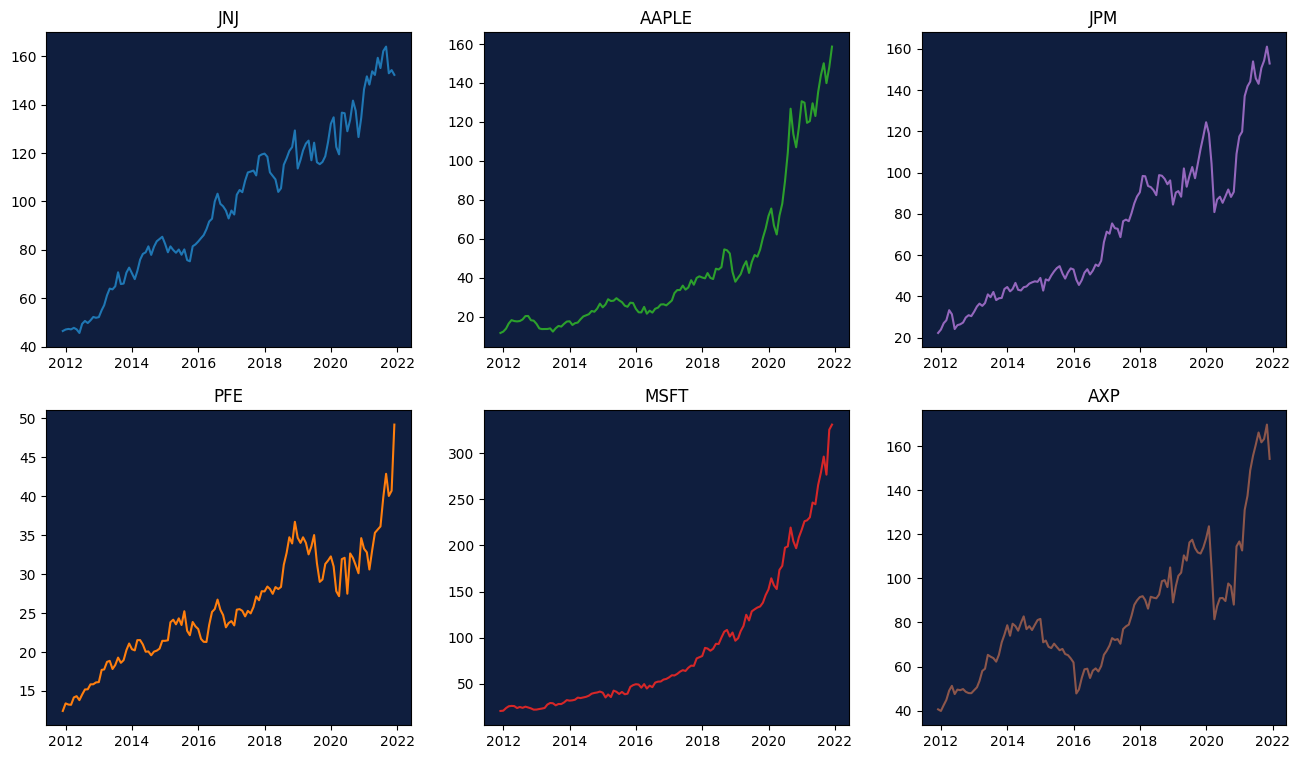

In [98]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
axs[0, 0].plot(JNJ_monthly_price, 'tab:blue')
axs[0, 0].set_title('JNJ')
axs[0, 0].set_facecolor("#0f1e3e")
axs[0, 1].plot(AAPL_monthly_price, 'tab:green')
axs[0, 1].set_title('AAPLE')
axs[0, 1].set_facecolor("#0f1e3e")
axs[0, 2].plot(JPM_monthly_price, 'tab:purple')
axs[0, 2].set_title('JPM')
axs[0, 2].set_facecolor("#0f1e3e")
axs[1, 0].plot(PFE_monthly_price, 'tab:orange')
axs[1, 0].set_title('PFE')
axs[1, 0].set_facecolor("#0f1e3e")
axs[1, 1].plot(MSFT_monthly_price, 'tab:red')
axs[1, 1].set_title('MSFT')
axs[1, 1].set_facecolor("#0f1e3e")
axs[1, 2].plot(AXP_monthly_price, 'tab:brown')
axs[1, 2].set_title('AXP')
axs[1, 2].set_facecolor("#0f1e3e")

# STATISTICHE DESCRITTIVE

In [99]:
import statsmodels.api as sm
import seaborn as sb
from pandas.plotting import scatter_matrix

In [100]:
#calcolo il rendimento semplice netto mensile
all_adj_return_simple = pd.DataFrame()
all_adj_return_simple = ((all_stock_monthly_price_df - all_stock_monthly_price_df.shift(1))/ all_stock_monthly_price_df.shift(1)).dropna()
all_adj_return_simple

,JNJ,PFE,AAPL,MSFT,JPM,AXP
Date,,,,,,
2011-12-31,0.013288,0.078226,0.059655,0.014855,0.073620,-0.018110
2012-01-31,0.005032,-0.011091,0.127111,0.137519,0.129880,0.066932
2012-02-29,-0.003871,-0.002361,0.188311,0.081915,0.052011,0.054846
2012-03-31,0.013522,0.071936,0.105283,0.016383,0.171763,0.093969
2012-04-30,-0.013038,0.011038,-0.025970,-0.007439,-0.059127,0.044215
...,...,...,...,...,...,...
2021-07-31,0.045283,0.103109,0.064982,0.051717,-0.018551,0.034769
2021-08-31,0.011375,0.076150,0.042489,0.061591,0.053828,-0.026799
2021-09-30,-0.067175,-0.066421,-0.068037,-0.066119,0.023383,0.009460


<Axes: title={'center': 'Rendimento Semplice'}, xlabel='Date'>

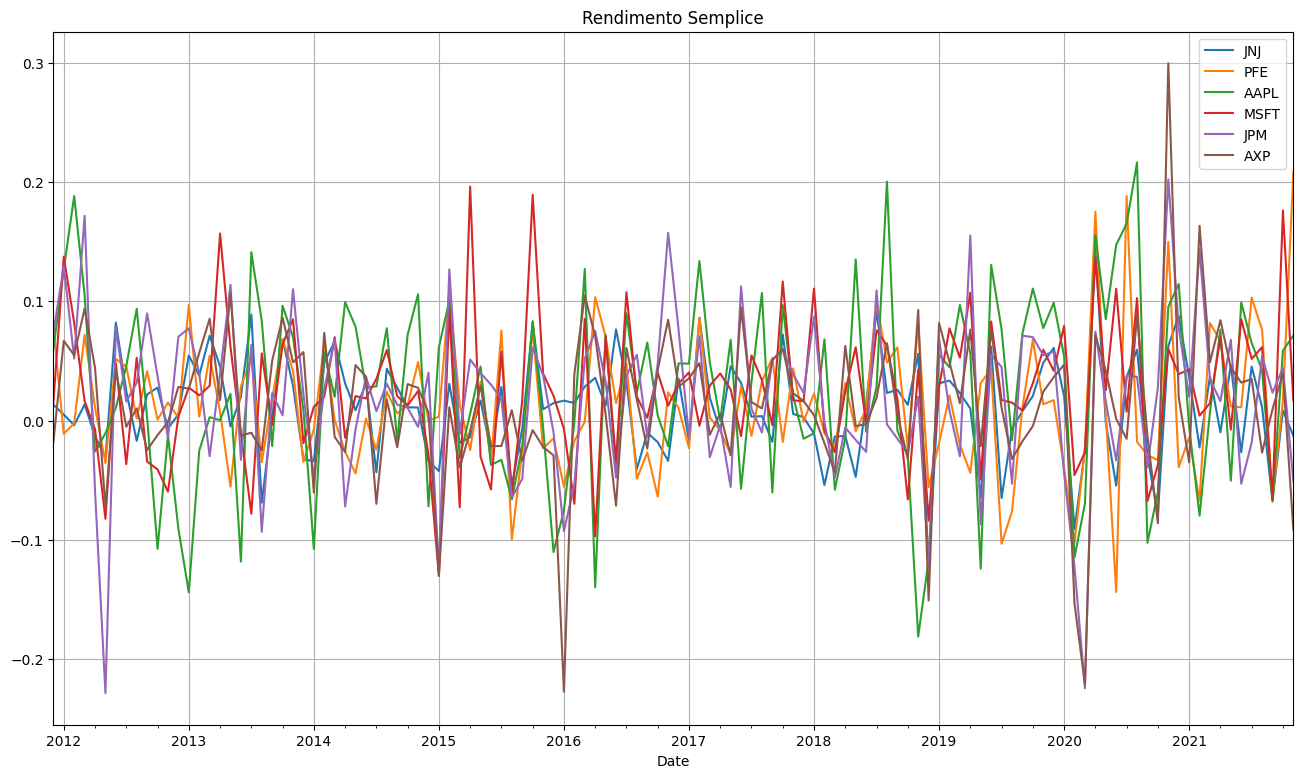

In [101]:
all_adj_return_simple.plot(grid = True, title="Rendimento Semplice", figsize = (16,9))

In [102]:
JNJ_adj_return_simple = ((JNJ_monthly_price - JNJ_monthly_price.shift(1))/ JNJ_monthly_price.shift(1)).dropna()
PFE_adj_return_simple = ((PFE_monthly_price - PFE_monthly_price.shift(1))/ PFE_monthly_price.shift(1)).dropna()
AAPL_adj_return_simple = ((AAPL_monthly_price - AAPL_monthly_price.shift(1))/ AAPL_monthly_price.shift(1)).dropna()
MSFT_adj_return_simple = ((MSFT_monthly_price - MSFT_monthly_price.shift(1))/ MSFT_monthly_price.shift(1)).dropna()
JPM_adj_return_simple = ((JPM_monthly_price - JPM_monthly_price.shift(1))/ JPM_monthly_price.shift(1)).dropna()
AXP_adj_return_simple = ((AXP_monthly_price - AXP_monthly_price.shift(1))/ AXP_monthly_price.shift(1)).dropna()

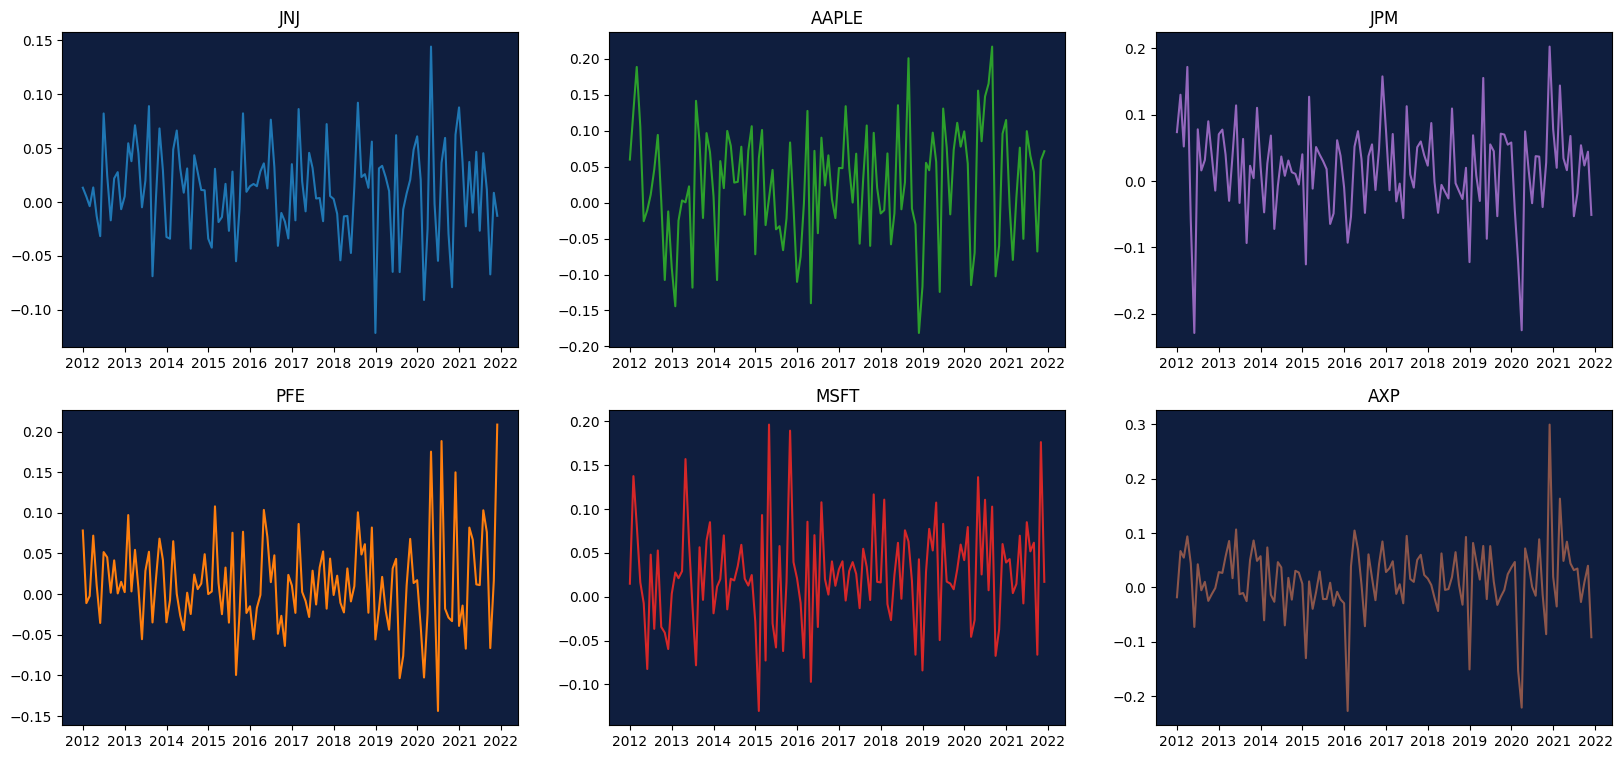

In [103]:
fig, axs = plt.subplots(2, 3, figsize=(20, 9))

axs[0, 0].plot(JNJ_adj_return_simple, 'tab:blue')
axs[0, 0].set_title('JNJ')
axs[0, 0].set_facecolor("#0f1e3e")
axs[0, 1].plot(AAPL_adj_return_simple, 'tab:green')
axs[0, 1].set_title('AAPLE')
axs[0, 1].set_facecolor("#0f1e3e")
axs[0, 2].plot(JPM_adj_return_simple, 'tab:purple')
axs[0, 2].set_title('JPM')
axs[0, 2].set_facecolor("#0f1e3e")
axs[1, 0].plot(PFE_adj_return_simple, 'tab:orange')
axs[1, 0].set_title('PFE')
axs[1, 0].set_facecolor("#0f1e3e")
axs[1, 1].plot(MSFT_adj_return_simple, 'tab:red')
axs[1, 1].set_title('MSFT')
axs[1, 1].set_facecolor("#0f1e3e")
axs[1, 2].plot(AXP_adj_return_simple, 'tab:brown')
axs[1, 2].set_title('AXP')
axs[1, 2].set_facecolor("#0f1e3e")

In [104]:
#calcolo il rendimento composto netto mensile

all_adj_return_compound  = pd.DataFrame()
all_adj_return_compound = ((all_adj_return_simple + 1).cumprod() - 1).dropna()
all_adj_return_compound

,JNJ,PFE,AAPL,MSFT,JPM,AXP
Date,,,,,,
2011-12-31,0.013288,0.078226,0.059655,0.014855,0.073620,-0.018110
2012-01-31,0.018387,0.066268,0.194348,0.154418,0.213061,0.047610
2012-02-29,0.014445,0.063751,0.419257,0.248982,0.276153,0.105068
2012-03-31,0.028162,0.140273,0.568682,0.269444,0.495349,0.208910
2012-04-30,0.014756,0.152858,0.527943,0.260000,0.406934,0.262362
...,...,...,...,...,...,...
2021-07-31,2.485929,2.208114,11.426651,12.709305,5.418374,3.092370
2021-08-31,2.525582,2.452413,11.954650,13.553674,5.763860,2.982700
2021-09-30,2.288751,2.223101,11.073260,12.591400,5.922017,3.020376


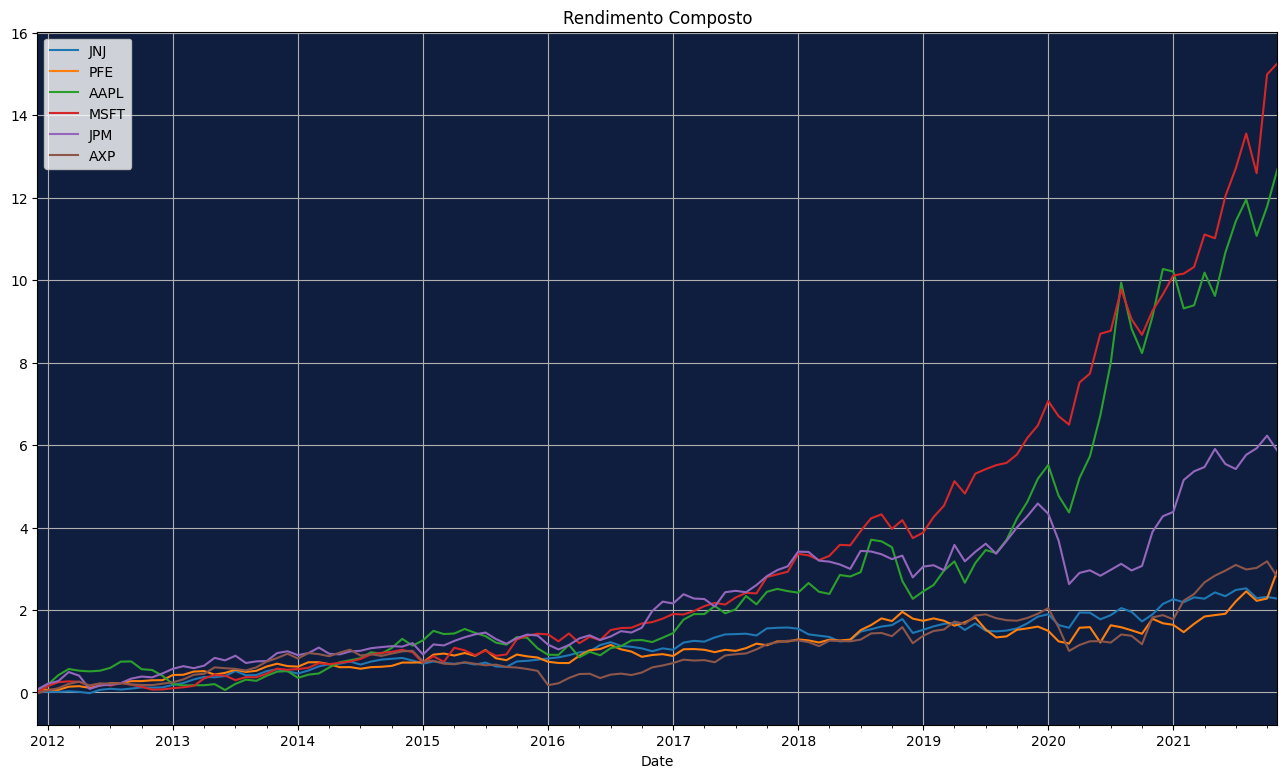

In [105]:
all_adj_return_compound.plot(grid = True, title="Rendimento Composto", figsize = (16,9)).set_facecolor("#0f1e3e")


In [106]:
JNJ_adj_return_compound = ((JNJ_adj_return_simple + 1).cumprod() - 1).dropna()
PFE_adj_return_compound = ((PFE_adj_return_simple + 1).cumprod() - 1).dropna()
AAPL_adj_return_compound = ((AAPL_adj_return_simple + 1).cumprod() - 1).dropna()
MSFT_adj_return_compound = ((MSFT_adj_return_simple + 1).cumprod() - 1).dropna()
JPM_adj_return_compound = ((JPM_adj_return_simple + 1).cumprod() - 1).dropna()
AXP_adj_return_compound = ((AXP_adj_return_simple + 1).cumprod() - 1).dropna()

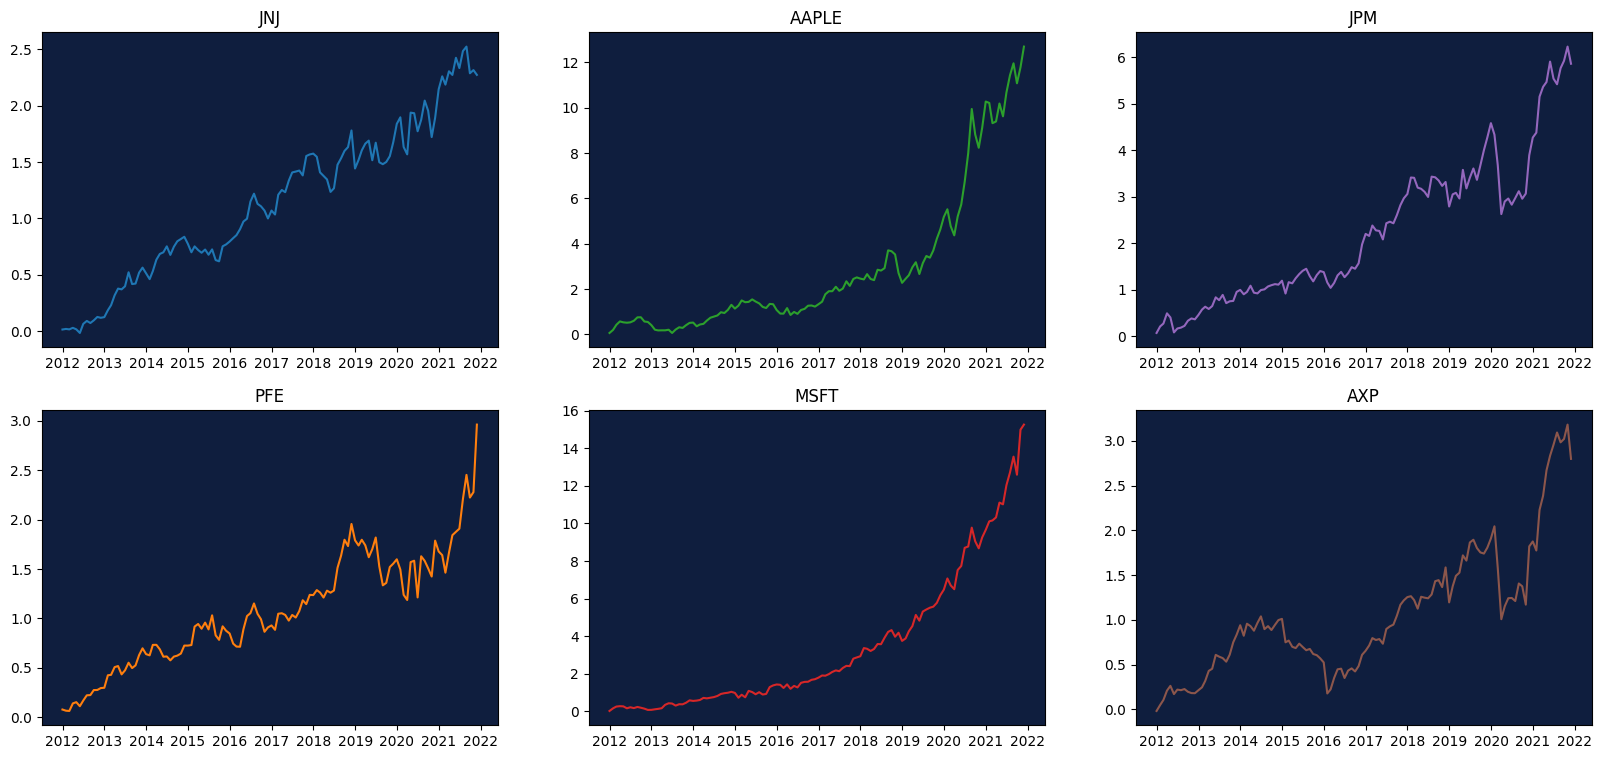

In [107]:
fig, axs = plt.subplots(2, 3, figsize=(20, 9))

axs[0, 0].plot(JNJ_adj_return_compound, 'tab:blue')
axs[0, 0].set_title('JNJ')
axs[0, 0].set_facecolor("#0f1e3e")
axs[0, 1].plot(AAPL_adj_return_compound, 'tab:green')
axs[0, 1].set_title('AAPLE')
axs[0, 1].set_facecolor("#0f1e3e")
axs[0, 2].plot(JPM_adj_return_compound, 'tab:purple')
axs[0, 2].set_title('JPM')
axs[0, 2].set_facecolor("#0f1e3e")
axs[1, 0].plot(PFE_adj_return_compound, 'tab:orange')
axs[1, 0].set_title('PFE')
axs[1, 0].set_facecolor("#0f1e3e")
axs[1, 1].plot(MSFT_adj_return_compound, 'tab:red')
axs[1, 1].set_title('MSFT')
axs[1, 1].set_facecolor("#0f1e3e")
axs[1, 2].plot(AXP_adj_return_compound, 'tab:brown')
axs[1, 2].set_title('AXP')
axs[1, 2].set_facecolor("#0f1e3e")


In [108]:
#acquisisco i rendimenti semplici delle aziende che apparengono allo stesso settore

health_care_return_simple = all_adj_return_simple[["JNJ","PFE"]]
technology_stock_return_simple = all_adj_return_simple[["AAPL","MSFT"]]
finance_stock_return_simple = all_adj_return_simple[["JPM","AXP"]]

In [109]:
#calcolo la correlazione delle aziende del settore sanitario

health_care_return_simple.corr().drop('PFE', axis = 1).drop('JNJ')

,JNJ
PFE,0.549338


In [110]:
#calcolo la correlazione delle aziende del settore tecnologico

technology_stock_return_simple.corr().drop('MSFT', axis = 1).drop('AAPL')

,AAPL
MSFT,0.490166


In [111]:
#calcolo la correlazione delle aziende del settore finanziario

finance_stock_return_simple.corr().drop('AXP', axis = 1).drop('JPM')

,JPM
AXP,0.674791


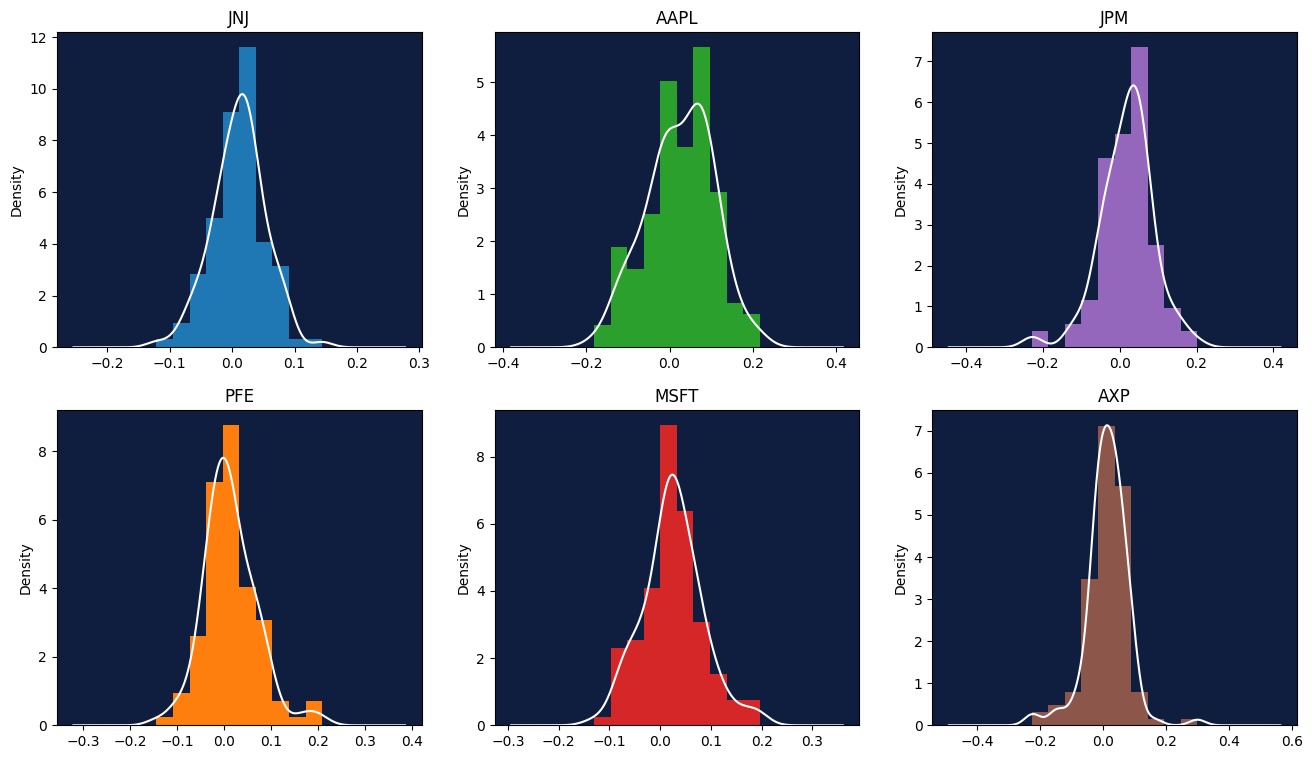

In [112]:
#costruisco gli istogrammi dei rendimenti
plt.figure(figsize = (16,9))

plt.subplot(231 + 0)
plt.title('JNJ')
plt.hist(JNJ_adj_return_simple, density = True, color = 'tab:blue')
JNJ_adj_return_simple.plot.density(grid = False, color='white').set_facecolor("#0f1e3e")

plt.subplot(231 + 1)
plt.title('AAPL')
plt.hist(AAPL_adj_return_simple, density = True, color = "tab:green")
AAPL_adj_return_simple.plot.density(grid = False, color='white').set_facecolor("#0f1e3e")

plt.subplot(231 + 2)
plt.title('JPM')
plt.hist(JPM_adj_return_simple, density = True, color = 'tab:purple')
JPM_adj_return_simple.plot.density(grid = False, color='white').set_facecolor("#0f1e3e")

plt.subplot(231 + 3)
plt.title('PFE')
plt.hist(PFE_adj_return_simple, density = True, color = 'tab:orange')
PFE_adj_return_simple.plot.density(grid = False, color='white').set_facecolor("#0f1e3e")

plt.subplot(231 + 4)
plt.title('MSFT')
plt.hist(MSFT_adj_return_simple, density = True, color = 'tab:red')
MSFT_adj_return_simple.plot.density(grid = False, color='white').set_facecolor("#0f1e3e")

plt.subplot(231 + 5)
plt.title('AXP')
plt.hist(AXP_adj_return_simple, density = True, color = 'tab:brown')
AXP_adj_return_simple.plot.density(grid = False, color='white').set_facecolor("#0f1e3e")



Text(0.5, 1.0, 'Densità')

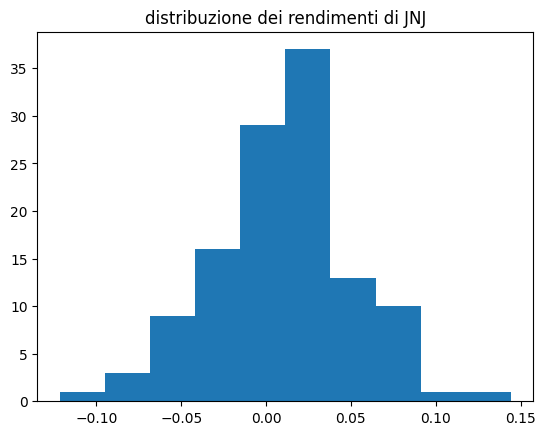

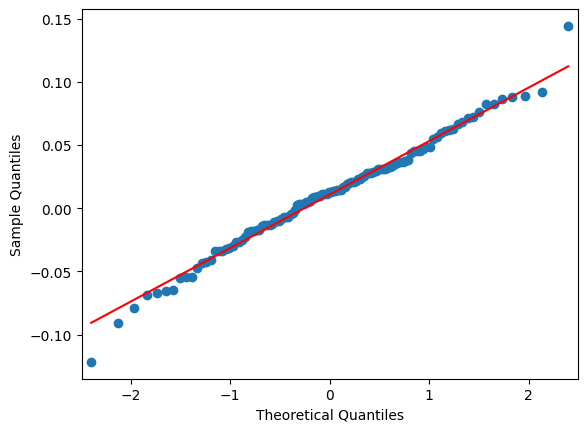

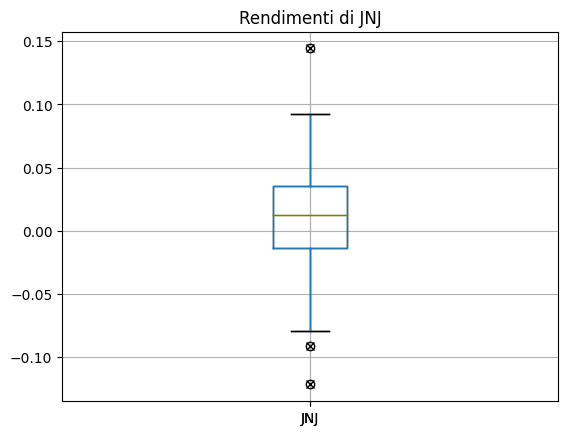

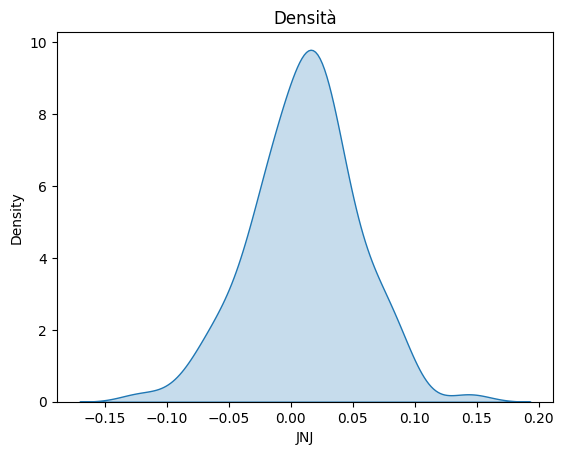

In [113]:
#costruisco i 4 grafici di JNJ
plt.figure()
plt.hist(all_adj_return_simple['JNJ'], color = 'tab:blue')
plt.title("distribuzione dei rendimenti di JNJ")

sm.qqplot(all_adj_return_simple['JNJ'], line = 's')
plt.figure()

plt.boxplot(all_adj_return_simple['JNJ'], sym = 'x')
plt.title("Rendimenti di JNJ")
all_adj_return_simple['JNJ'].to_frame().boxplot()
plt.figure()

sb.kdeplot(data = all_adj_return_simple['JNJ'], fill=True, color = 'tab:blue').set_title("Densità")

Text(0.5, 1.0, 'Densità')

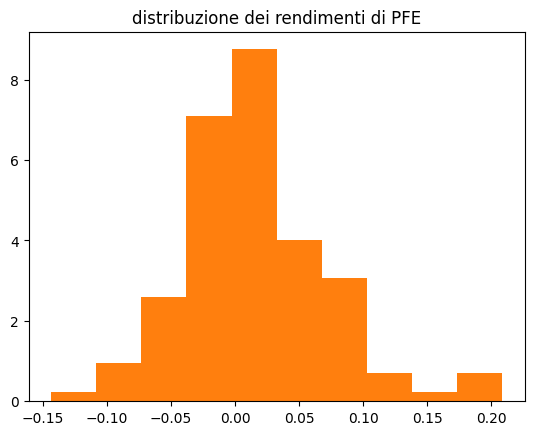

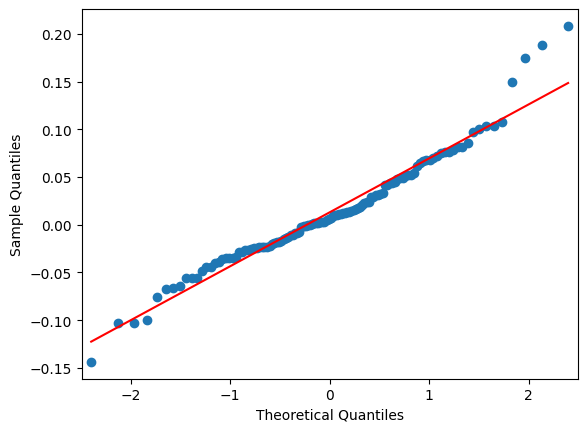

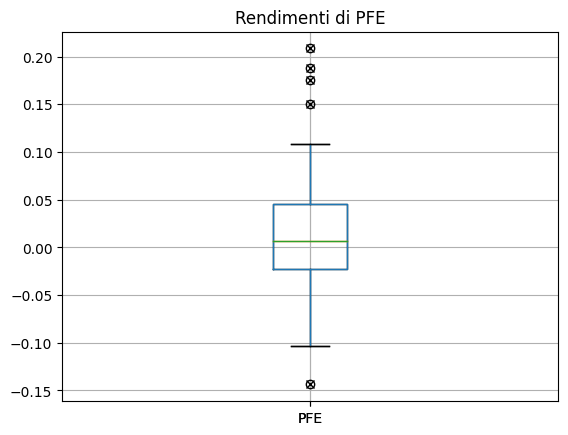

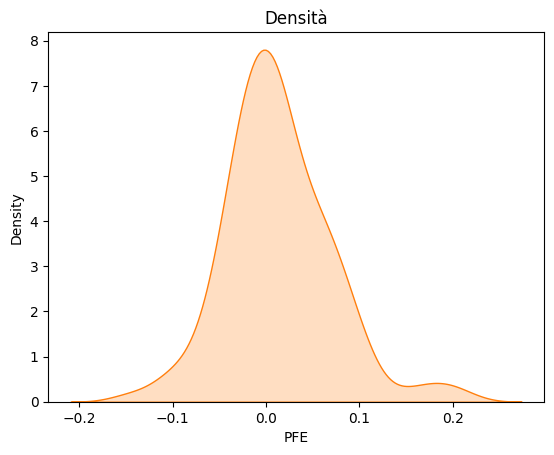

In [114]:
#costruisco i 4 grafici di PFE

plt.figure()
plt.hist(all_adj_return_simple['PFE'], density = True, color = 'tab:orange')
plt.title("distribuzione dei rendimenti di PFE")

sm.qqplot(all_adj_return_simple['PFE'], line = 's')
plt.figure()

plt.boxplot(all_adj_return_simple['PFE'], sym = 'x')
plt.title("Rendimenti di PFE")
all_adj_return_simple['PFE'].to_frame().boxplot()
plt.figure()

sb.kdeplot(data = all_adj_return_simple['PFE'], fill=True, color = 'tab:orange').set_title("Densità")

Text(0.5, 1.0, 'Densità')

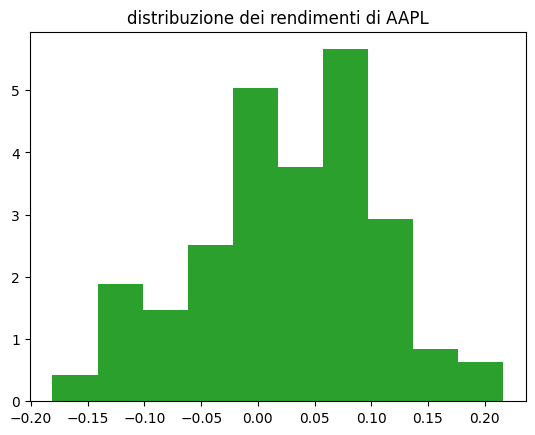

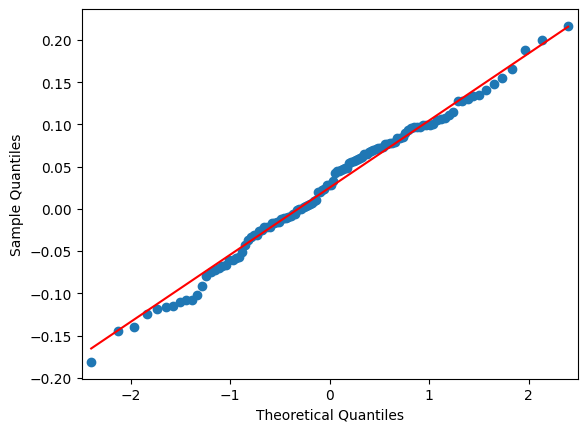

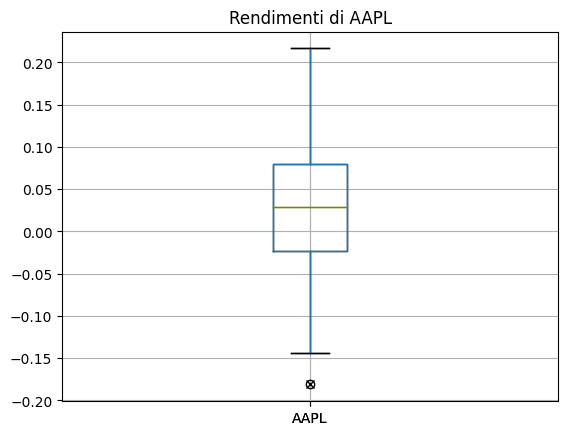

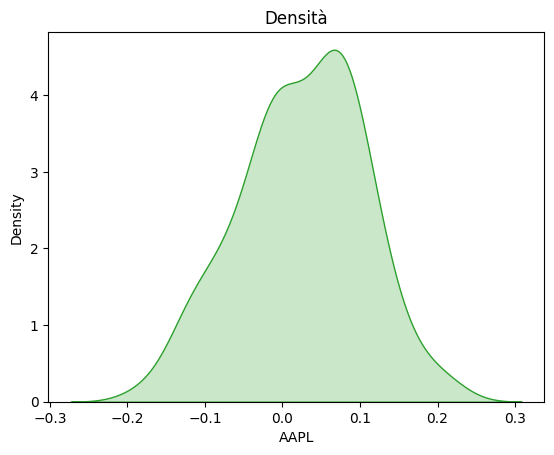

In [115]:
#costruisco i 4 grafici di AAPL

plt.figure()
plt.hist(all_adj_return_simple['AAPL'], density = True, color = 'tab:green')
plt.title("distribuzione dei rendimenti di AAPL")

sm.qqplot(all_adj_return_simple['AAPL'], line = 's')
plt.figure()

plt.boxplot(all_adj_return_simple['AAPL'], sym = 'x')
plt.title("Rendimenti di AAPL")
all_adj_return_simple['AAPL'].to_frame().boxplot()
plt.figure()

sb.kdeplot(data = all_adj_return_simple['AAPL'], fill=True, color = 'tab:green').set_title("Densità")

Text(0.5, 1.0, 'Densità')

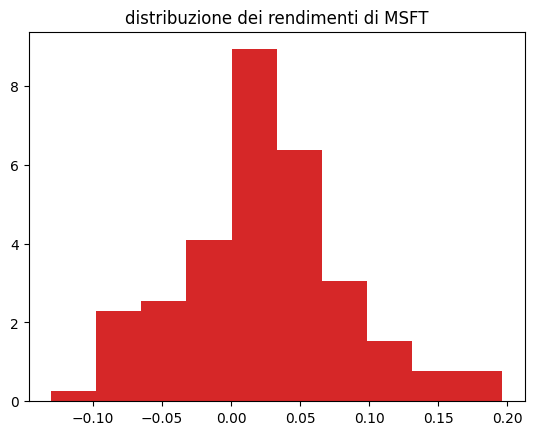

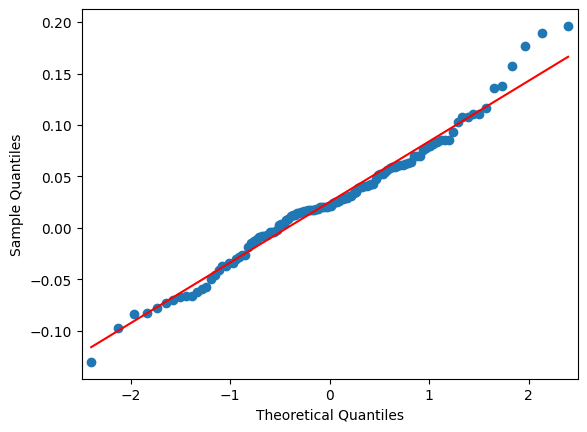

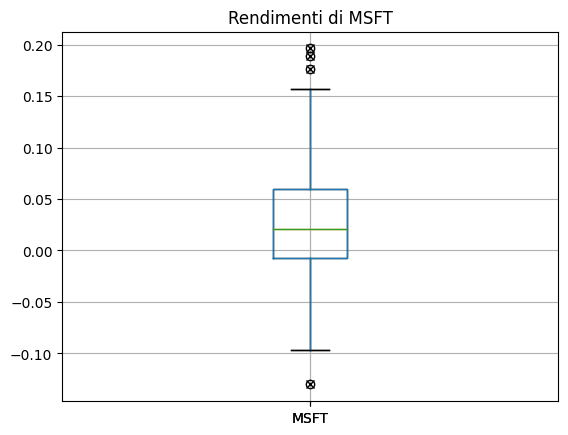

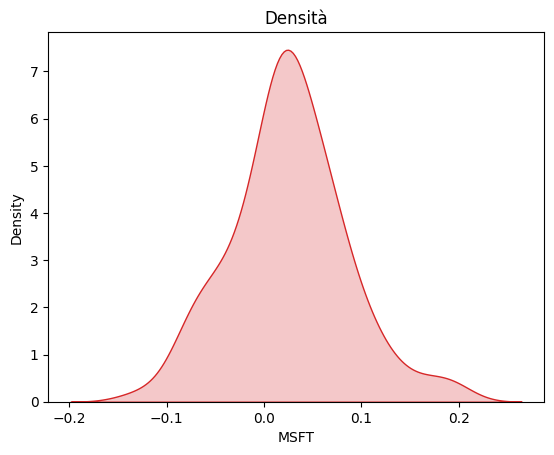

In [116]:
#costruisco i 4 grafici di MSFT


plt.figure()
plt.hist(all_adj_return_simple['MSFT'], density = True, color = 'tab:red')
plt.title("distribuzione dei rendimenti di MSFT")

sm.qqplot(all_adj_return_simple['MSFT'], line = 's')
plt.figure()

plt.boxplot(all_adj_return_simple['MSFT'], sym = 'x')
plt.title("Rendimenti di MSFT")
all_adj_return_simple['MSFT'].to_frame().boxplot()
plt.figure()

sb.kdeplot(data = all_adj_return_simple['MSFT'], fill=True, color = 'tab:red').set_title("Densità")

Text(0.5, 1.0, 'Densità')

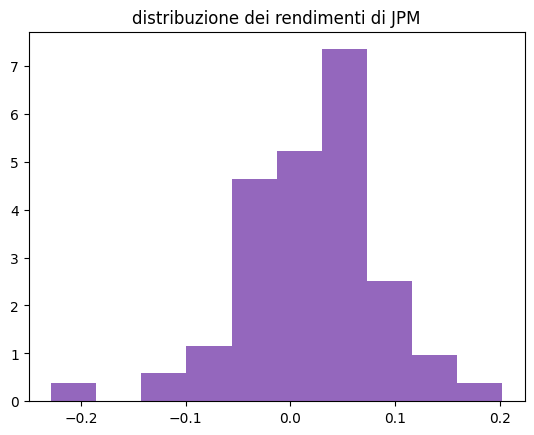

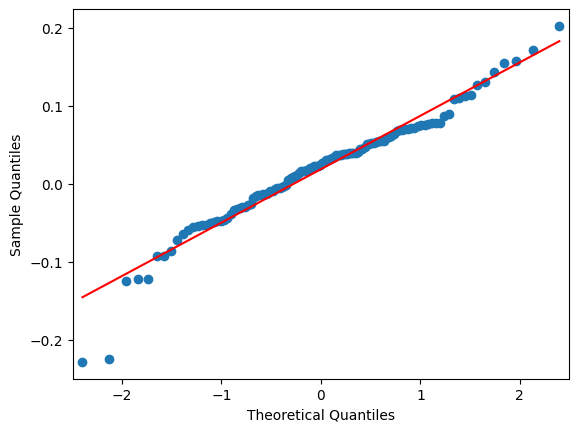

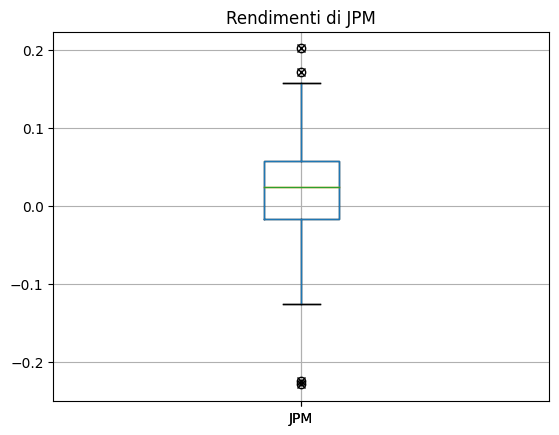

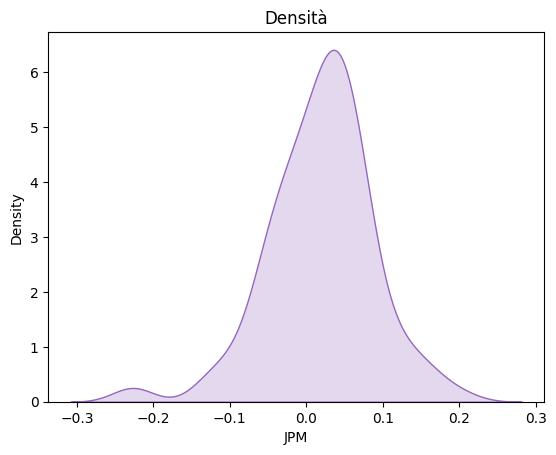

In [117]:
#costruisco i 4 grafici di JPM

plt.figure()
plt.hist(all_adj_return_simple['JPM'], density = True, color = 'tab:purple')
plt.title("distribuzione dei rendimenti di JPM")

sm.qqplot(all_adj_return_simple['JPM'], line = 's')
plt.figure()

plt.boxplot(all_adj_return_simple['JPM'], sym = 'x')
plt.title("Rendimenti di JPM")
all_adj_return_simple['JPM'].to_frame().boxplot()
plt.figure()

sb.kdeplot(data = all_adj_return_simple['JPM'], fill=True, color = 'tab:purple').set_title("Densità")

Text(0.5, 1.0, 'Densità')

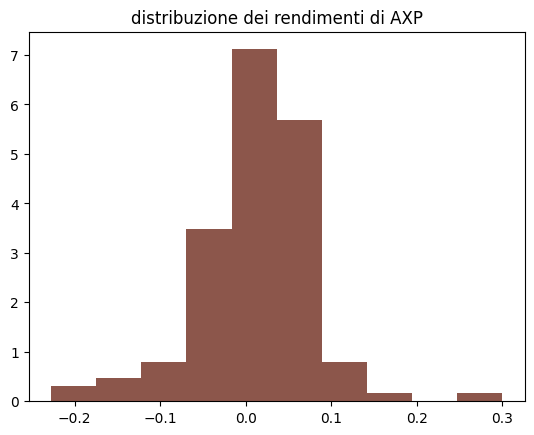

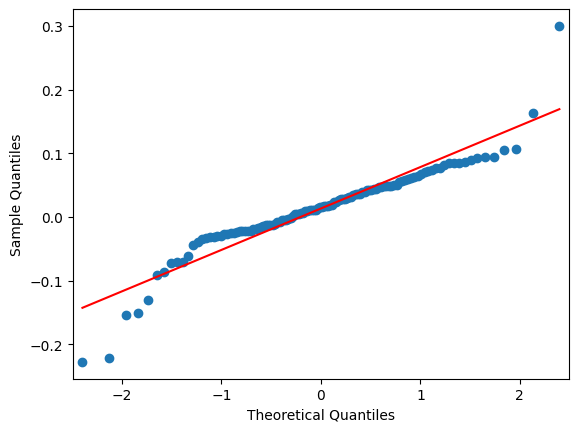

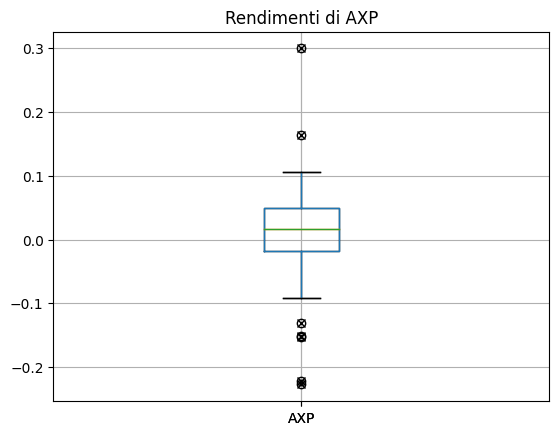

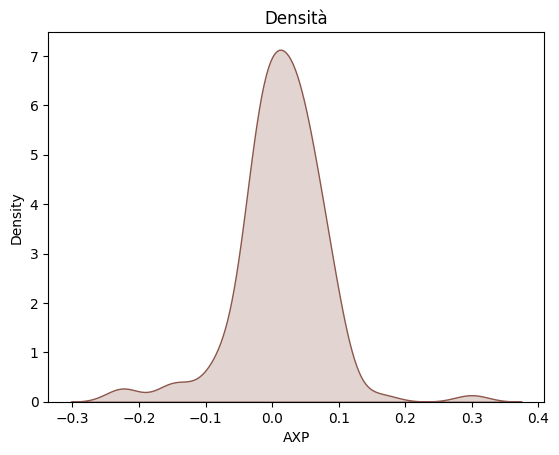

In [118]:
#costruisco i 4 grafici di AXP

plt.figure()
plt.hist(all_adj_return_simple['AXP'], density = True, color = 'tab:brown')
plt.title("distribuzione dei rendimenti di AXP")

sm.qqplot(all_adj_return_simple['AXP'], line = 's')
plt.figure()

plt.boxplot(all_adj_return_simple['AXP'], sym = 'x')
plt.title("Rendimenti di AXP")
all_adj_return_simple['AXP'].to_frame().boxplot()
plt.figure()

sb.kdeplot(data = all_adj_return_simple['AXP'], fill=True, color = 'tab:brown').set_title("Densità")

In [119]:
#calcolo la media di tutti i RS

media = all_adj_return_simple.mean()

In [120]:
#calcolo la varianza di tutti i RS
varianza = all_adj_return_simple.var()

In [121]:
#calcolo la deviazione standard di tutti i RS
devSTD = all_adj_return_simple.std()

In [122]:
#calcolo l'asimmetria di tutti i RS
asimmetria = all_adj_return_simple.skew()

In [123]:
#calcolo l'indice K di curtosi di tutti i RS
curtosi = all_adj_return_simple.kurtosis()

In [124]:
#trovo il max e min dei RC
last_return = all_adj_return_compound.iloc[-1,:]
last_return

JNJ      2.274423
PFE      2.961241
AAPL    12.692176
MSFT    15.258665
JPM      5.859072
AXP      2.797734
Name: 2021-11-30 00:00:00, dtype: float64

In [125]:
#creo un df con tutti i prezzi MENSILI delle aziende

data = {'Media': media,
        'Varianza': varianza,
        'STD': devSTD,
        'Asimmetria': asimmetria,
        'Curtosi': curtosi,
        'Ritorno': last_return
       }

univariate = pd.DataFrame(data, columns= ['Media','Varianza','STD','Asimmetria','Curtosi','Ritorno'])

In [126]:
#statistiche univariate

univariate

,Media,Varianza,STD,Asimmetria,Curtosi,Ritorno
JNJ,0.010824,0.001805,0.042482,-0.117346,0.666328,2.274423
PFE,0.013090,0.003226,0.056798,0.607350,1.567621,2.961241
AAPL,0.025177,0.006367,0.079794,-0.193145,-0.307377,12.692176
MSFT,0.025193,0.003494,0.059110,0.242321,0.599244,15.258665
JPM,0.018566,0.004737,0.068828,-0.574093,1.956769,5.859072
AXP,0.013326,0.004261,0.065278,-0.309902,4.995021,2.797734


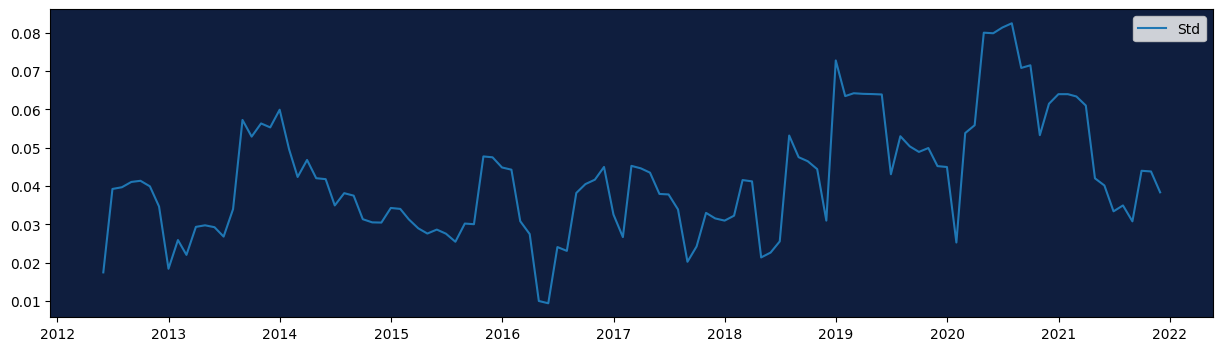

In [127]:
#evoluzione nel tempo volatilità di JNJ

JNJ_df_std = all_adj_return_simple['JNJ'].rolling(6).std()
plt.figure(figsize=(15,4))
ax = plt.axes()
ax.set_facecolor("#0f1e3e")
plt.plot(JNJ_df_std, label = 'Std')
plt.legend(loc='upper right');

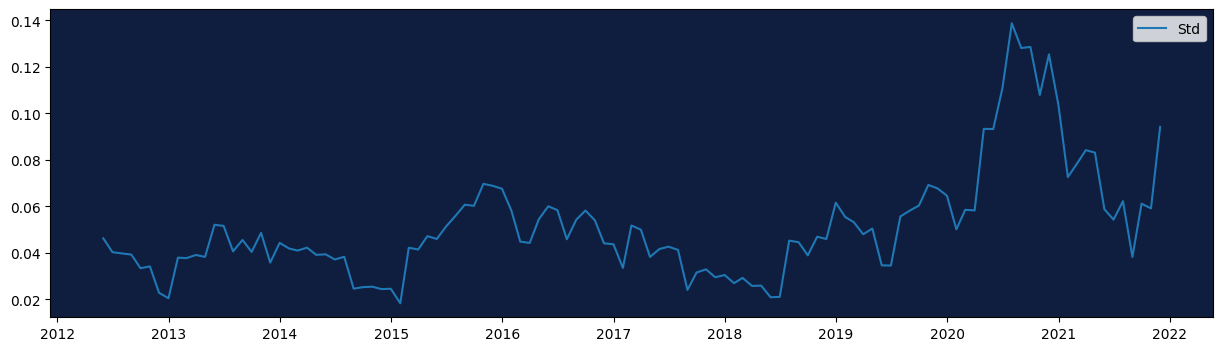

In [128]:
#evoluzione nel tempo volatilità di PFE

PFE_df_std = all_adj_return_simple['PFE'].rolling(6).std()
plt.figure(figsize=(15,4))
ax = plt.axes()
ax.set_facecolor("#0f1e3e")
plt.plot(PFE_df_std, label = 'Std')
plt.legend(loc='upper right');

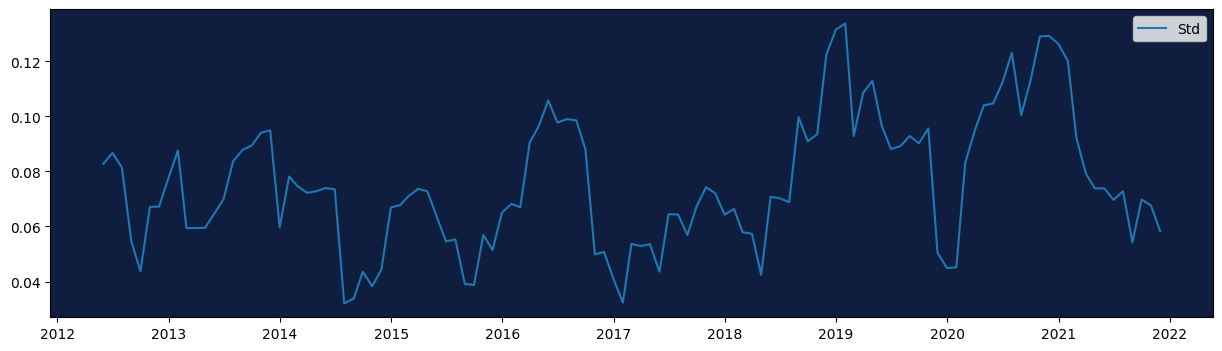

In [129]:
#evoluzione nel tempo volatilità di AAPL

AAPL_df_std = all_adj_return_simple['AAPL'].rolling(6).std()
plt.figure(figsize=(15,4))
ax = plt.axes()
ax.set_facecolor("#0f1e3e")
plt.plot(AAPL_df_std, label = 'Std')
plt.legend(loc='upper right');

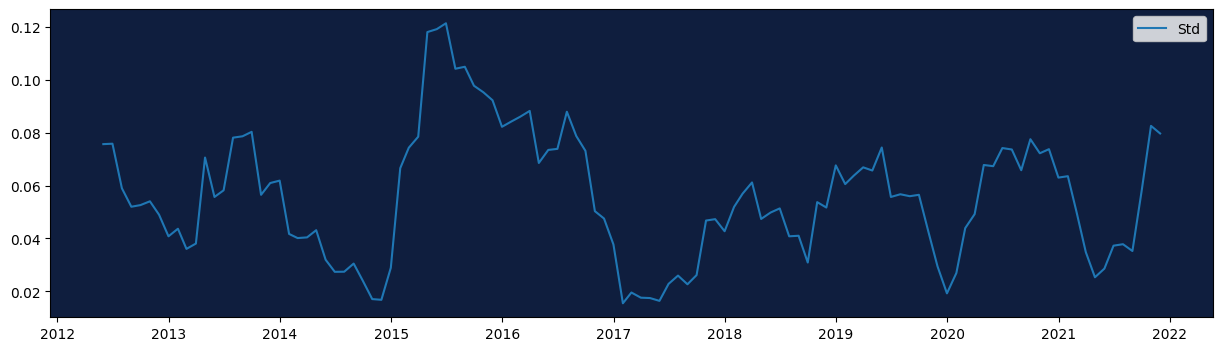

In [130]:
#evoluzione nel tempo volatilità di MSFT

MSFT_df_std = all_adj_return_simple['MSFT'].rolling(6).std()
plt.figure(figsize=(15,4))
ax = plt.axes()
ax.set_facecolor("#0f1e3e")
plt.plot(MSFT_df_std, label = 'Std')
plt.legend(loc='upper right');

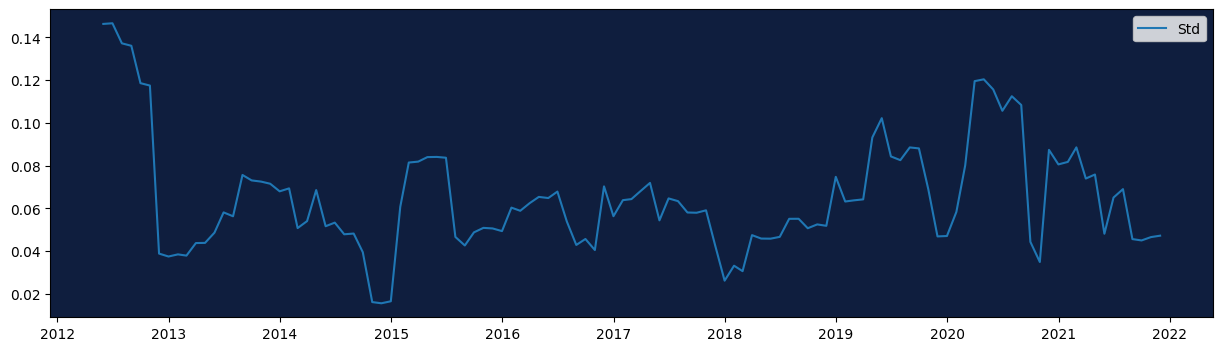

In [131]:
#evoluzione nel tempo volatilità di JPM

JPM_df_std = all_adj_return_simple['JPM'].rolling(6).std()
plt.figure(figsize=(15,4))
ax = plt.axes()
ax.set_facecolor("#0f1e3e")
plt.plot(JPM_df_std, label = 'Std')
plt.legend(loc='upper right');

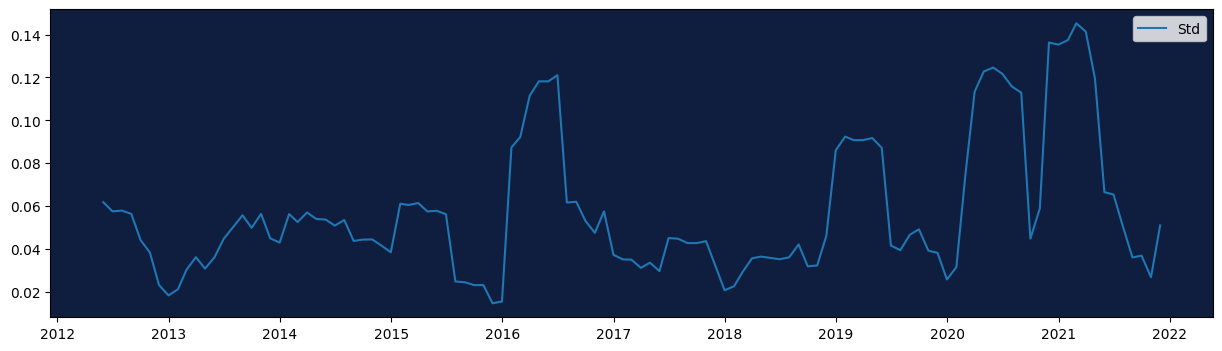

In [132]:
#evoluzione nel tempo volatilità di AXP

AXP_df_std = all_adj_return_simple['AXP'].rolling(6).std()
plt.figure(figsize=(15,4))
ax = plt.axes()
ax.set_facecolor("#0f1e3e")
plt.plot(AXP_df_std, label = 'Std')
plt.legend(loc='upper right');

In [133]:
#calcolo la matrice di covarianza dei RS
all_adj_return_simple.cov().style.background_gradient(cmap='Blues')

,JNJ,PFE,AAPL,MSFT,JPM,AXP
JNJ,0.001805,0.001326,0.001059,0.000894,0.001193,0.001069
PFE,0.001326,0.003226,0.000902,0.000523,0.001269,0.000989
AAPL,0.001059,0.000902,0.006367,0.002312,0.001284,0.001543
MSFT,0.000894,0.000523,0.002312,0.003494,0.001622,0.001414
JPM,0.001193,0.001269,0.001284,0.001622,0.004737,0.003032
AXP,0.001069,0.000989,0.001543,0.001414,0.003032,0.004261


In [134]:
#calcolo la matrice di correlazione dei RS
all_adj_return_simple.corr().style.background_gradient(cmap='Blues')

,JNJ,PFE,AAPL,MSFT,JPM,AXP
JNJ,1.000000,0.549338,0.312525,0.356021,0.407881,0.385458
PFE,0.549338,1.000000,0.198980,0.155823,0.324533,0.266753
AAPL,0.312525,0.198980,1.000000,0.490166,0.233835,0.296227
MSFT,0.356021,0.155823,0.490166,1.000000,0.398618,0.366385
JPM,0.407881,0.324533,0.233835,0.398618,1.000000,0.674791
AXP,0.385458,0.266753,0.296227,0.366385,0.674791,1.000000


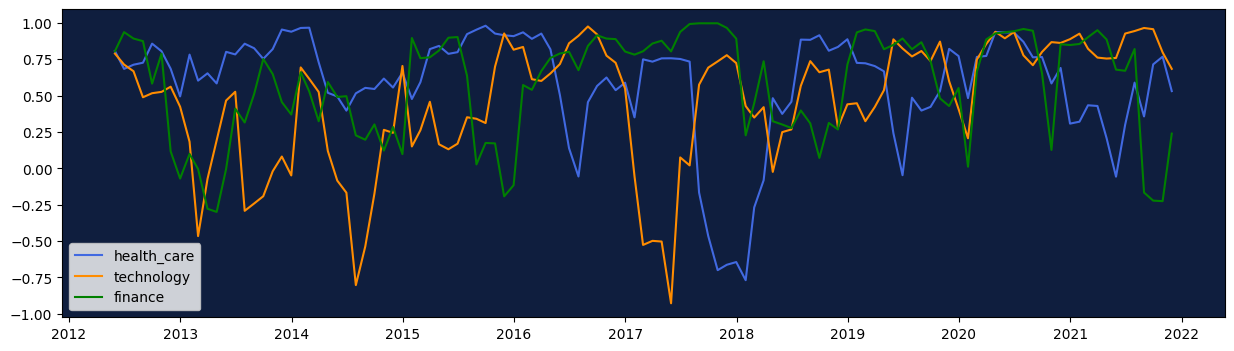

In [135]:
#andamento delle correlazioni
health_care_correlation = health_care_return_simple["JNJ"].rolling(6).corr(health_care_return_simple["PFE"]).dropna()
technology_correlation = technology_stock_return_simple["AAPL"].rolling(6).corr(technology_stock_return_simple["MSFT"]).dropna()
finance_correlation = finance_stock_return_simple["JPM"].rolling(6).corr(finance_stock_return_simple["AXP"]).dropna()

plt.figure(figsize=(15, 4))
plt.plot(health_care_correlation, label="health_care", color="royalblue")
plt.plot(technology_correlation, label="technology", color="darkorange")
plt.plot(finance_correlation, label="finance", color="green")

# Imposta il colore dello sfondo del grafico
plt.gca().set_facecolor("#0f1e3e")

plt.legend()
plt.show()

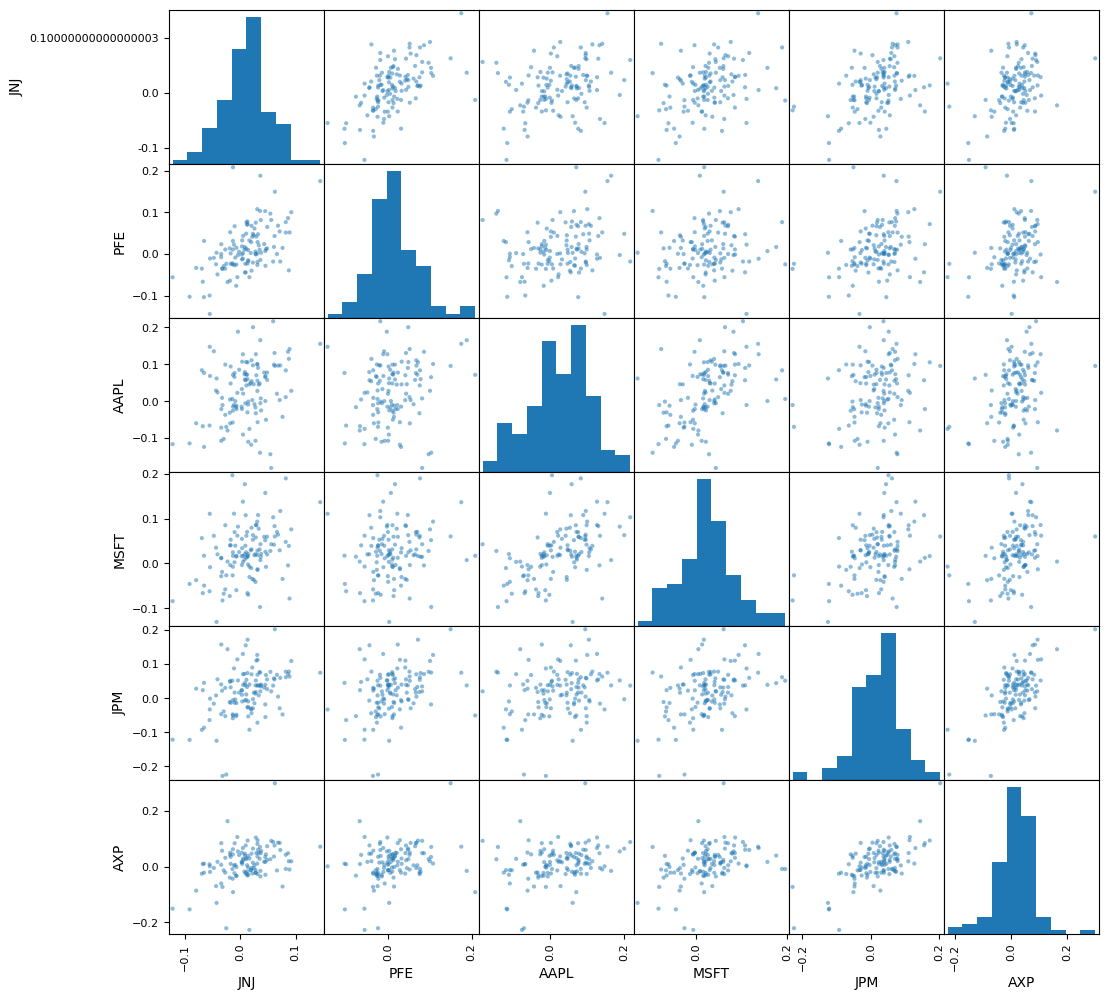

In [136]:
#calcolo scatter plots dei RS

scatter_matrix(all_adj_return_simple,figsize=(12,12));

# STRATEGIE DI TRADING E BACKTESTING

In [137]:
import matplotlib.dates as mdates
from matplotlib import style
import datetime as dt

In [138]:
JNJ_df = yf.download("JNJ", starting_date, ending_date)
PFE_df = yf.download("PFE", starting_date, ending_date)
AAPL_df = yf.download("AAPL", starting_date, ending_date)
MSFT_df = yf.download("MSFT", starting_date, ending_date)
JPM_df = yf.download("JPM", starting_date, ending_date)
AXP_df = yf.download("AXP", starting_date, ending_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [139]:
#seleziono il titolo e calcolo EMA12 ed EMA26

EWM12 = JNJ_df['Adj Close'].ewm(span = 12, adjust = False).mean()
EWM26 = JNJ_df['Adj Close'].ewm(span = 26, adjust = False).mean()

<ipython-input-140-89a1d56a0ddd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])
<ipython-input-140-89a1d56a0ddd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Change'] = data[['JNJ']] / data[['JNJ']].shift(1)
<ipython-input-140-89a1d56a0ddd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

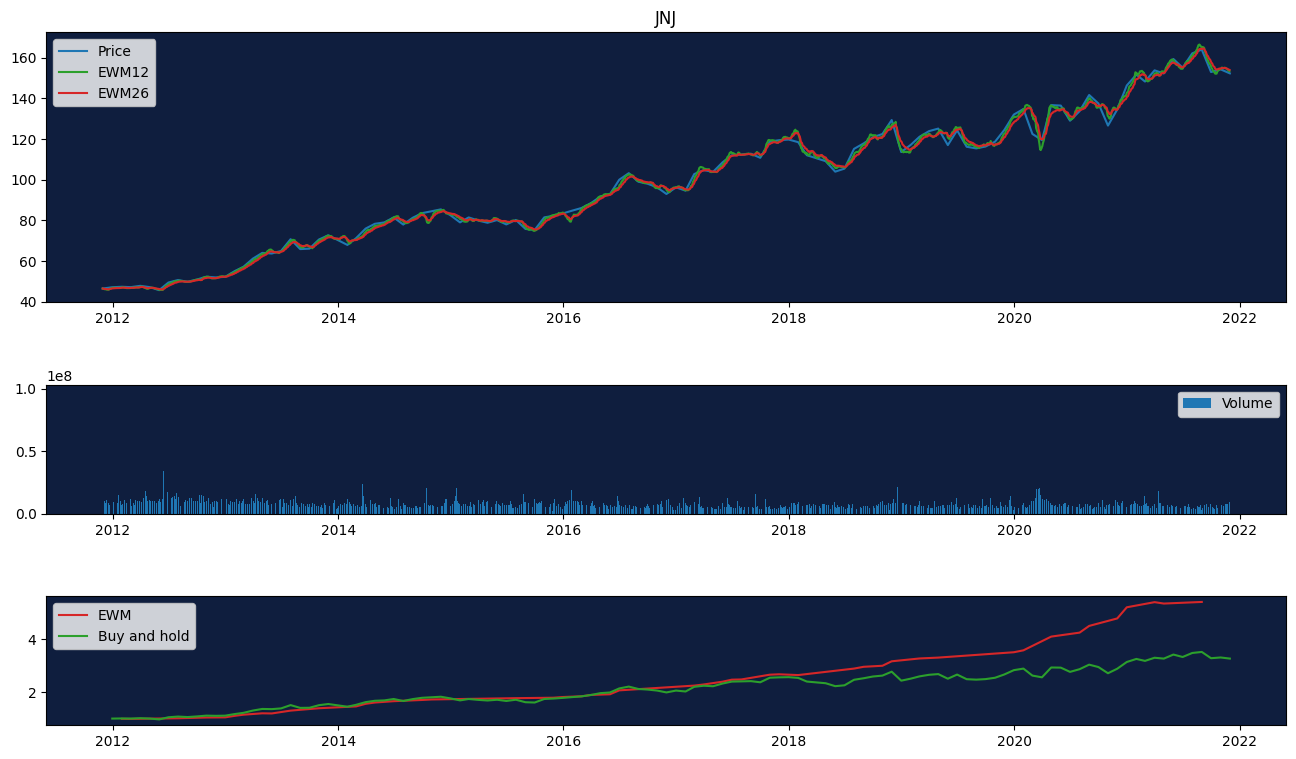

In [140]:
stock_vol_adj = pd.DataFrame()
stock_vol_adj['Change'] = JNJ_df['Adj Close'].resample('M').last() / JNJ_df['Adj Close'].resample('M').last().shift(1)
stock_vol_adj['EWM12'] = EWM12
stock_vol_adj['EWM26'] = EWM26
stock_vol_adj['Invested_EWM'] = [1 if stock_vol_adj.loc[i, 'EWM12'] > stock_vol_adj.loc[i, 'EWM26']
                        else 0 for i in stock_vol_adj.index]
ewm = stock_vol_adj[stock_vol_adj['Invested_EWM'] == 1]
ewm['Return'] = np.cumprod(ewm['Change'])

data = all_stock_monthly_price_df[['JNJ']]
data['Change'] = data[['JNJ']] / data[['JNJ']].shift(1)
data['Buy_and_hold'] = np.cumprod(data['Change'])

JNJ_return = ewm['Return']
JNJ_Buy_and_hold = data['Buy_and_hold']

#stampa grafico
plt.figure(figsize=(16,9))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1, title = 'JNJ')
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)
ax1.set_facecolor("#0f1e3e")
ax2.set_facecolor("#0f1e3e")
ax3.set_facecolor("#0f1e3e")


ax1.plot(all_stock_monthly_price_df[['JNJ']], label = 'Price')
ax1.plot(EWM12, label = 'EWM12', color = 'tab:green')
ax1.plot(EWM26, label = 'EWM26', color = 'tab:red')
ax2.bar(JNJ_df.index, JNJ_df['Volume'], label = 'Volume')
ax3.plot(JNJ_return, label ='EWM', color = 'tab:red')
ax3.plot(JNJ_Buy_and_hold, label = 'Buy and hold', color = 'tab:green')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# CAPM

In [141]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [142]:
#scarico i dati di S&P500
GSPC_df = yf.download("^GSPC", starting_date, ending_date)

[*********************100%%**********************]  1 of 1 completed


In [143]:
#calcolo il prezzo mensile
GSPC_monthly_price = GSPC_df['Adj Close'].resample('M').last()
all_stock_monthly_price_df['GSPC'] = GSPC_monthly_price

In [144]:
all_stock_monthly_price_pct_df = all_stock_monthly_price_df.resample('M').last().pct_change().dropna()

In [145]:
#calcolo della covarianza
covariance = all_stock_monthly_price_pct_df.cov().iloc[6:7]

In [146]:
#calcolo varianza
benchmark_variance = all_stock_monthly_price_pct_df['GSPC'].var()

In [147]:
#calcolo beta
beta = covariance / benchmark_variance
beta = beta.drop(columns = 'GSPC')

In [148]:
beta

,JNJ,PFE,AAPL,MSFT,JPM,AXP
GSPC,0.716239,0.783685,1.250115,0.960473,1.257907,1.221245


In [149]:
rf = yf.download("^IRX", starting_date, ending_date)

[*********************100%%**********************]  1 of 1 completed


In [150]:
rf = rf.resample('M').last()
rf["mrf"] = (1 + rf["Adj Close"])**(30/360) - 1
rf = rf["mrf"]

In [151]:
GSPC_monthly_price_pct = GSPC_monthly_price.pct_change()

In [152]:
rf_val = rf.iloc[-12].mean()

In [153]:
mrk_val = GSPC_monthly_price_pct.iloc[-12].mean()

In [154]:
#calcolo dingoli CAPM
capm_JNJ = rf_val + beta['JNJ']*(mrk_val - rf_val)
capm_PFE = rf_val + beta['PFE']*(mrk_val - rf_val)
capm_AAPL = rf_val + beta['AAPL']*(mrk_val - rf_val)
capm_MSFT = rf_val + beta['MSFT']*(mrk_val - rf_val)
capm_JPM = rf_val + beta['JPM']*(mrk_val - rf_val)
capm_AXP = rf_val + beta['AXP']*(mrk_val - rf_val)

In [155]:
#DataFrame dei vari CAPM
data = {'JNJ': capm_JNJ,
        'PFE': capm_PFE,
        'AAPL': capm_AAPL,
        'MSFT': capm_MSFT,
        'JPM': capm_JPM,
        'AXP': capm_AXP
       }

capm = pd.DataFrame(data, columns= ['JNJ','PFE','AAPL','MSFT','JPM','AXP'])
capm = capm.rename(index={'GSPC': 'CAPM'})

In [156]:
capm

,JNJ,PFE,AAPL,MSFT,JPM,AXP
CAPM,0.028081,0.03023,0.04509,0.035862,0.045338,0.04417
